# Digit Recognition 
## Dataset - Keras-MNIST

## Importing Libraries

In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Importing dataset

In [52]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

## Dataset at a Glance

In [53]:
len(x_train)

60000

In [54]:
len(x_test)

10000

In [55]:
x_train[0].shape

(28, 28)

## Label Data

In [56]:
x_train = x_train / 255
x_test = x_test / 255

In [57]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flatternd The data

In [58]:
x_train_falttened = x_train.reshape(len(x_train),28*28)
x_test_falttened = x_test.reshape(len(x_test),28*28)

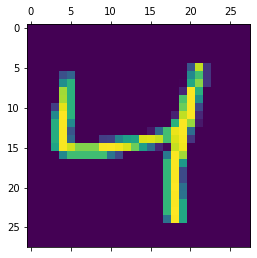

In [59]:
plt.matshow(x_train[2])

In [60]:
y_train[2]

4

In [61]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Model Building

In [62]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
               
)
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2695 - accuracy: 0.9238
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1253 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0337 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

## Model Evaluate

In [63]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0803 - accuracy: 0.9781


[0.08029914647340775, 0.9781000018119812]

## Prediction

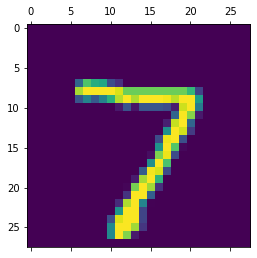

In [64]:
plt.matshow(x_test[0])

In [65]:
y_test[0]

7

In [66]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [67]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [68]:
y_pred = model.predict(x_test)
y_pred[0]

array([1.4138520e-02, 4.6939997e-05, 2.2386926e-01, 8.8828135e-01,
       8.2435929e-07, 2.5229901e-02, 1.9910674e-08, 9.9999487e-01,
       2.0883104e-01, 6.5749252e-01], dtype=float32)

In [69]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    0,    1,    3,    2,    1,    4,    0],
       [   0, 1125,    2,    1,    0,    0,    1,    1,    5,    0],
       [   4,    2, 1003,    3,    2,    1,    2,    3,   12,    0],
       [   1,    0,    4,  981,    0,   11,    0,    2,    5,    6],
       [   2,    0,    3,    0,  957,    0,    4,    5,    1,   10],
       [   3,    0,    0,    1,    3,  875,    3,    1,    5,    1],
       [   6,    2,    1,    1,    4,    7,  932,    0,    5,    0],
       [   1,    4,    7,    1,    1,    0,    0, 1004,    4,    6],
       [   3,    0,    2,    2,    4,    1,    0,    1,  957,    4],
       [   3,    3,    0,    4,   10,    1,    0,    6,    2,  980]],
      dtype=int32)>

## Confusion Metrix

Text(69.0, 0.5, 'Truth')

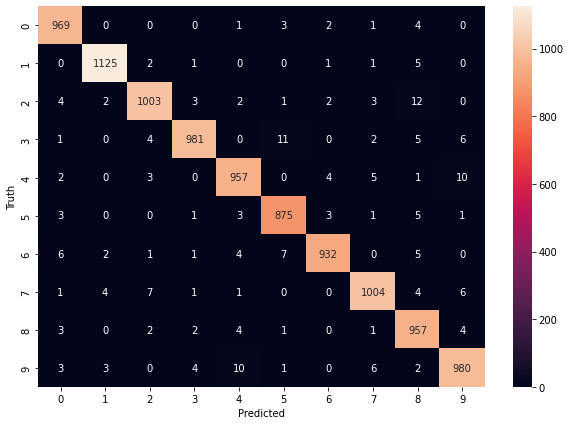

In [70]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")